In [4]:
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Create the table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS sales (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        product_name TEXT NOT NULL,
        quantity INTEGER NOT NULL,
        price REAL NOT NULL,
        sale_date TEXT NOT NULL
    )
''')

# Sample data to insert
sample_data = [
    ("Laptop", 2, 75000.00, "2025-04-01"),
    ("Keyboard", 5, 1500.00, "2025-04-02"),
    ("Mouse", 3, 800.00, "2025-04-03"),
    ("Monitor", 1, 12000.00, "2025-04-03"),
    ("Headphones", 4, 2500.00, "2025-04-04")
]

# Insert sample data
cursor.executemany('''
    INSERT INTO sales (product_name, quantity, price, sale_date)
    VALUES (?, ?, ?, ?)
''', sample_data)

# Commit and close
conn.commit()


print(" Sample data inserted into 'sales' table successfully.")


 Sample data inserted into 'sales' table successfully.


In [2]:
print(sample_data)

[('Laptop', 2, 75000.0, '2025-04-01'), ('Keyboard', 5, 1500.0, '2025-04-02'), ('Mouse', 3, 800.0, '2025-04-03'), ('Monitor', 1, 12000.0, '2025-04-03'), ('Headphones', 4, 2500.0, '2025-04-04')]


**Show all records from the sales table**

In [5]:
cursor.execute("SELECT * FROM sales")
rows = cursor.fetchall()
print("All Sales Records:")
for row in rows:
    print(row)

All Sales Records:
(1, 'Laptop', 2, 75000.0, '2025-04-01')
(2, 'Keyboard', 5, 1500.0, '2025-04-02')
(3, 'Mouse', 3, 800.0, '2025-04-03')
(4, 'Monitor', 1, 12000.0, '2025-04-03')
(5, 'Headphones', 4, 2500.0, '2025-04-04')
(6, 'Laptop', 2, 75000.0, '2025-04-01')
(7, 'Keyboard', 5, 1500.0, '2025-04-02')
(8, 'Mouse', 3, 800.0, '2025-04-03')
(9, 'Monitor', 1, 12000.0, '2025-04-03')
(10, 'Headphones', 4, 2500.0, '2025-04-04')


Total revenue generated (price × quantity for each row)



In [6]:
cursor.execute("SELECT SUM(price * quantity) AS total_revenue FROM sales")
total = cursor.fetchone()
print("\nTotal Revenue:", total[0])



Total Revenue: 363800.0


Group by product and show total quantity sold per product

In [10]:
cursor.execute("""
    SELECT product_name, SUM(quantity) AS total_quantity
    FROM sales
    GROUP BY product_name
""")
grouped = cursor.fetchall()
print("\nTotal Quantity Sold per Product:")
for row in grouped:
    print(row)



Total Quantity Sold per Product:
('Headphones', 8)
('Keyboard', 10)
('Laptop', 4)
('Monitor', 2)
('Mouse', 6)


Bar Chart: Total Quantity Sold per Product

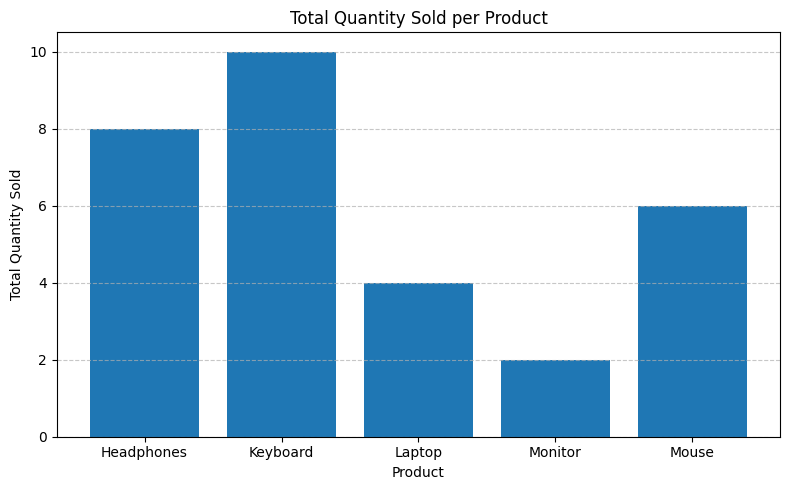

In [11]:
import matplotlib.pyplot as plt


# Query to get total quantity sold per product
cursor.execute("""
    SELECT product_name, SUM(quantity) AS total_quantity
    FROM sales
    GROUP BY product_name
""")
results = cursor.fetchall()

# Separate data for plotting
products = [row[0] for row in results]
quantities = [row[1] for row in results]

# Plot the bar chart
plt.figure(figsize=(8, 5))
plt.bar(products, quantities)
plt.xlabel("Product")
plt.ylabel("Total Quantity Sold")
plt.title("Total Quantity Sold per Product")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Close connection
conn.close()
